## $\textbf{ Generate 1000 samples from $N(\mu=20,\sigma=10)$}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

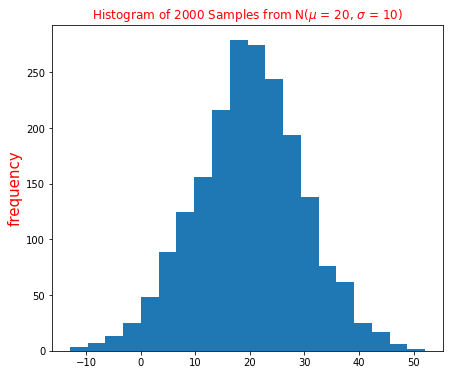

In [2]:
#Plotting Histogram
D = np.random.normal(20, 10, 2000)
plt.figure(figsize=(7,6))
plt.hist(D,bins=20)
plt.title('Histogram of 2000 Samples from N($\mu$ = 20, $\sigma$ = 10)', color= 'r')
plt.ylabel('frequency', fontsize = 15, color = 'r')
plt.show()

## $\large\textbf{2.3 Create a function for prior}$

In [3]:
def Prior(theta):
  if theta[1] > 0:
    return 1
  else:
    return 0

## $\textbf{2.4 Transition Model}$

In [4]:
def Transition_Model(theta):
  return [theta[0], np.random.normal(theta[1],1)]

$\textbf{2.5 log-likelihood function}$

In [5]:
def Log_Likelihood(theta, D):
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))

$\Large \textbf{5: Explain why taking logarithm is helpful?}$ \

$Answer:$ \
*Likelihood function is a product of marginal likelihood of each points. Taking logarithm of the likelihood trasforms this likelihood as the sum of log of likelihoood of each point. Now as we know that summation  is less expensive in comparison to multiplication, also logarithm is a strictly increasing function, so it doesn't alter the the behavior (eg. monotonocity) of the original function. But more important thing is that likelihoods becomes very small and we run out our floating point precisions very speedly this gives an underflow. That's why the log-likelihood is more helpful than the total-likelihood.*

## $\textbf{2.6 The Acceptance probability }$

In [6]:
def Acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    accept = np.random.uniform(0,1)
    if accept < np.exp(theta_new - theta_current):
      return True
    else:
      return False

In [7]:
def Metropolis_Algorithm(Log_Likelihood, Prior, Transition_Model, Initial_State, Iterations, D, Acceptance):
  theta = Initial_State
  Accepted = []
  Rejected = []   
  IterA = []
  IterR = []
  for i in range(Iterations):
    theta_new = Transition_Model(theta)
    theta_lik = Log_Likelihood(theta, D)
    theta_new_lik = Log_Likelihood(theta_new, D) 
    if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      IterA.append(i)
    else:
      Rejected.append(theta_new) 
      IterR.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(IterA), np.array(IterR)

For First 500 Iterations :


<ipython-input-5-059d20feb29a>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
<ipython-input-7-67898829f75b>:11: RuntimeWarning: divide by zero encountered in log
  if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:


[]

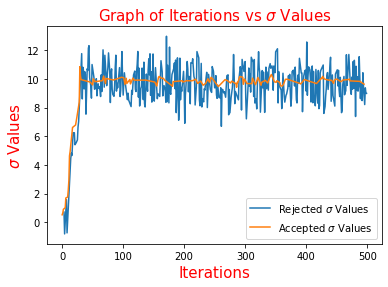

In [8]:
Accepted, Rejected, IterA, IterR = Metropolis_Algorithm(Log_Likelihood, Prior, Transition_Model, [20,0.1], 500, D, Acceptance)
print('For First 500 Iterations :')
plt.plot(IterR, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\sigma$ Values', color = 'r', fontsize='15')
plt.xlabel('Iterations', color='r', fontsize='15')
plt.ylabel(r'$\sigma$ Values', color='r', fontsize='15')
plt.plot()

<ipython-input-5-059d20feb29a>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
<ipython-input-7-67898829f75b>:11: RuntimeWarning: divide by zero encountered in log
  if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:


For 50000 Iterations :


[]

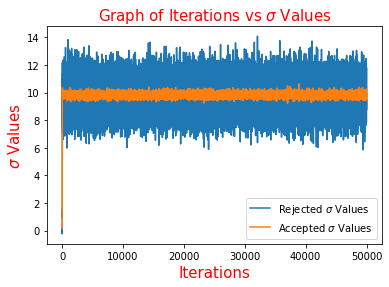

In [9]:
Accepted, Rejected, IterA, IterR = Metropolis_Algorithm(Log_Likelihood, Prior, Transition_Model, [20,0.1], 50000, D, Acceptance)
print('For 50000 Iterations :')
plt.plot(IterR, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\sigma$ Values', color = 'r', fontsize='15')
plt.xlabel('Iterations', color = 'r', fontsize='15')
plt.ylabel(r'$\sigma$ Values', color = 'r', fontsize='15')
plt.plot()

## $\large \textbf{7.Answer :}$ 
*We can see that our rejected region of $\sigma$ values is oscillating very fastly about $\sigma =10 $ but our accepted region is converging nearby $\sigma = 10$ which is same as the value of $\sigma$ we take to generate the data $\textbf{D}$. So, we are getting only those $\sigma$ value which we want and we are rejecting the unwanted $\sigma$ values.*

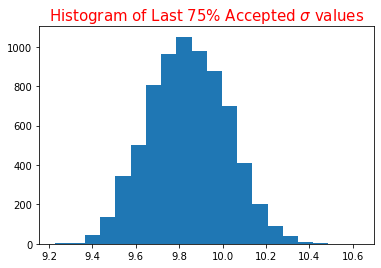

In [10]:
New_Accepted = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.hist(New_Accepted,bins=20)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values', color = 'r', fontsize='15')
plt.show()

## $\large \textbf{8. Why dropping first few $\sigma$ values makes sense ?}$ \
$\large \textbf{Answer :}$ \
*In the starting, we start from some intial condition. So, it takes some iterations to reach to the convergence to optimal $\sigma$ value. So, if we remove few starting values of $\sigma$ from accepted reagion then we get the distribution of this accepted region of $\sigma$ looking exactly like the normal distribution. That's why, dropping first few $\sigma$ values makes sense.*

## $\large \textbf{9.  and 10}$

In [11]:
def Prior(theta):
  if theta[1] > 0:
    if 10 <= theta[0] <= 30:
      return 1/20
    else:
      return 0
  else:
    return 0

In [12]:
def Transition_Model(theta):
  return np.random.multivariate_normal(theta, np.identity(2))

In [13]:
def Log_Likelihood(theta, D):
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))

In [14]:
def Acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    accept = np.random.uniform(0,1)
    if accept < np.exp(theta_new - theta_current):
      return True
    else:
      return False

In [15]:
def Metropolis_Algorithm(Log_Likelihood, Prior, Transition_Model, Initial_State, Iterations, D, Acceptance):
  theta = Initial_State
  Accepted = []
  Rejected = []   
  IterA = []
  IterR = []
  for i in range(Iterations):
    theta_new = Transition_Model(theta)
    theta_lik = Log_Likelihood(theta, D)
    theta_new_lik = Log_Likelihood(theta_new, D) 
    if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      IterA.append(i)
    else:
      Rejected.append(theta_new) 
      IterR.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(IterA), np.array(IterR)

<ipython-input-13-059d20feb29a>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
<ipython-input-15-67898829f75b>:11: RuntimeWarning: divide by zero encountered in log
  if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:


For First 500 Iterations :


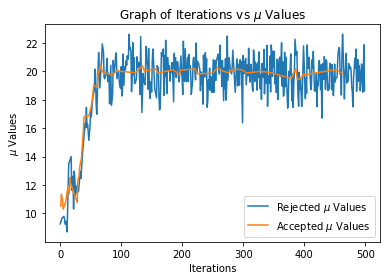

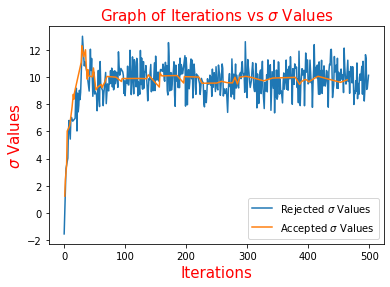

In [16]:
Accepted, Rejected, IterA, IterR = Metropolis_Algorithm(Log_Likelihood, Prior, Transition_Model, [10,0.1], 500, D, Acceptance)
print('For First 500 Iterations :')
plt.plot(IterR, Rejected[:,0], label = r'Rejected $\mu$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,0], label = r'Accepted $\mu$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\mu$ Values')
plt.xlabel('Iterations')
plt.ylabel(r'$\mu$ Values')
plt.show()
plt.plot(IterR, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\sigma$ Values', color = 'r', fontsize='15')
plt.xlabel('Iterations', color = 'r', fontsize='15')
plt.ylabel(r'$\sigma$ Values', color = 'r', fontsize='15')
plt.show()

<ipython-input-13-059d20feb29a>:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
<ipython-input-15-67898829f75b>:11: RuntimeWarning: divide by zero encountered in log
  if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:


For 50000 Iterations :


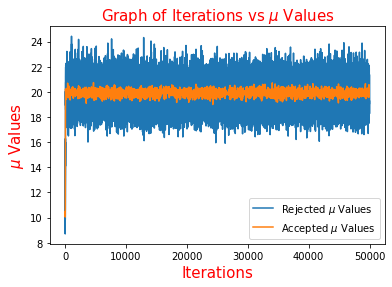

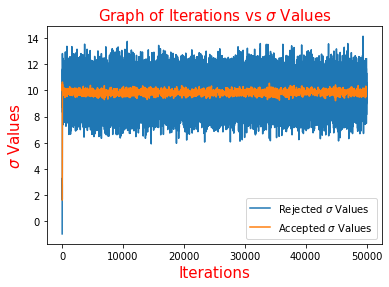

In [17]:
Accepted, Rejected, IterA, IterR = Metropolis_Algorithm(Log_Likelihood, Prior, Transition_Model, [10,0.1], 2*25000, D, Acceptance)
print('For 50000 Iterations :')
plt.plot(IterR, Rejected[:,0], label = r'Rejected $\mu$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,0], label = r'Accepted $\mu$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\mu$ Values', color = 'r', fontsize='15')
plt.xlabel('Iterations', color = 'r', fontsize='15')
plt.ylabel(r'$\mu$ Values', color = 'r', fontsize='15')
plt.show()
plt.plot(IterR, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\sigma$ Values', color = 'r', fontsize='15')
plt.xlabel('Iterations', color = 'r', fontsize='15')
plt.ylabel(r'$\sigma$ Values', color = 'r', fontsize='15')
plt.show()

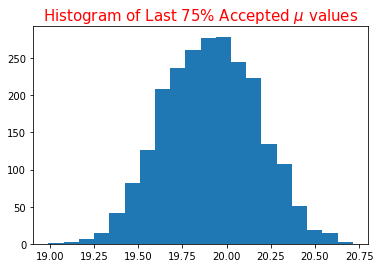

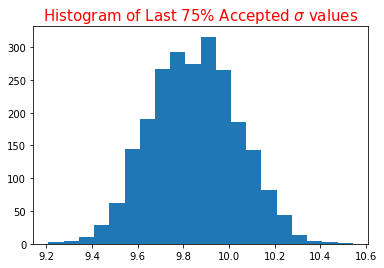

In [18]:
New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.hist(New_Accepted_mu,bins=20)
plt.title(r'Histogram of Last 75% Accepted $\mu$ values', color = 'r', fontsize='15')
plt.show()
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.hist(New_Accepted_sigma,bins=20)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values', color = 'r', fontsize='15')
plt.show()